###Cài đặt TensorFlow

In [ ]:
pip install tensorflow-gpu==2.11.0

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install matplotlib

     ---------------------------------------- 8.1/8.1 MB 8.9 MB/s eta 0:00:00
     -------------------------------------- 219.8/219.8 kB 6.8 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 10.0 MB/s eta 0:00:00
     ---------------------------------------- 72.0/72.0 kB 3.9 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 14.0 MB/s eta 0:00:00
     -------------------------------------- 111.1/111.1 kB 6.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Cài đặt các thư viện

Các thư viện gồm
- numpy
- matplotlib
- Dataset Fashion MNIST


####Cài đặt thư viện

In [6]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


###Tiền xử lý dữ liệu

#### Cài đặt dataset

In [7]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
# Kiểm tra hình dạng dữ liệu và phạm vi giá trị
print(train_images.shape)
print("Minimum value: {}, Maximum Value: {}".format(train_images.max(), train_images.min()))
# train_images[0]

(60000, 28, 28)
Minimum value: 255, Maximum Value: 0


In [9]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255
print("Before:",train_labels)
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print("After:", train_labels)

Before: [9 0 0 ... 3 0 5]
After: [[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [10]:
train_labels[1].argmax()

np.int64(0)

In [11]:
train_images.shape, train_labels.shape

((60000, 28, 28, 1), (60000, 10))

In [12]:
print(test_images.shape, test_labels.shape)

(10000, 28, 28, 1) (10000, 10)


In [13]:
print("Minimum value: {}, Maximum Value: {}".format(train_images.max(), train_images.min()))

Minimum value: 1.0, Maximum Value: 0.0


Dữ liệu nằm trong khoảng từ 0-1 với kiểu giá trị float.
Kiểm tra lớp labels

In [14]:
train_labels

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Lables ở dạng số/phân loại, chúng ta có thể ánh xạ chúng thành các string:

In [15]:
labels_dict = {0: "T-shirt/top",    1: "Trouser",    2: "Pullover",    3: "Dress",4: "Coat",5: "Sandal",6: "Shirt",7: "Sneaker",8: "Bag",9: "Ankle boot"}

Trong thư viện có 60000 hình ảnh để đào tạo và 10000 hình ảnh để thử nghiệm. Hãy kiểm tra bất kỳ mẫu dữ liệu nào để kiểm tra xem nó đã chỉ vào đúng dữ liệu hay không

Actual Label:  3
Mapped Label Dress


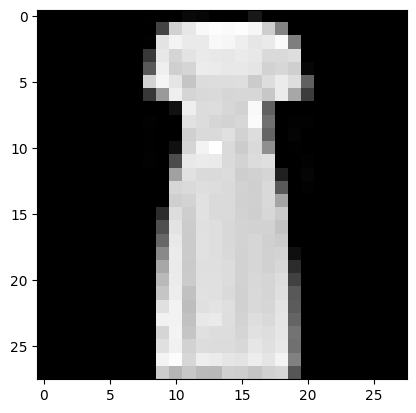

In [16]:
#Có thể thay số labels kiểm tra các dữ liệu khác
print("Actual Label: ", train_labels[50].argmax())
print("Mapped Label", labels_dict[train_labels[50].argmax()])
plt.imshow(train_images[50], cmap='gray')

Mỗi ảnh có kích thước 28x28 pixel và được gán nhãn từ 0 đến 9 tương ứng với 10 loại quần áo: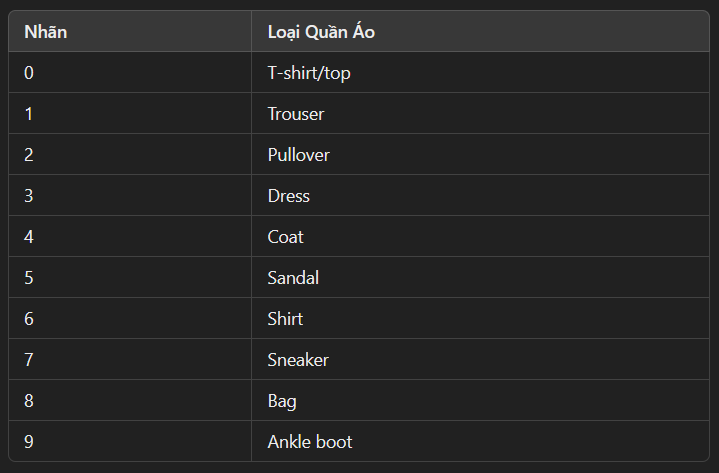
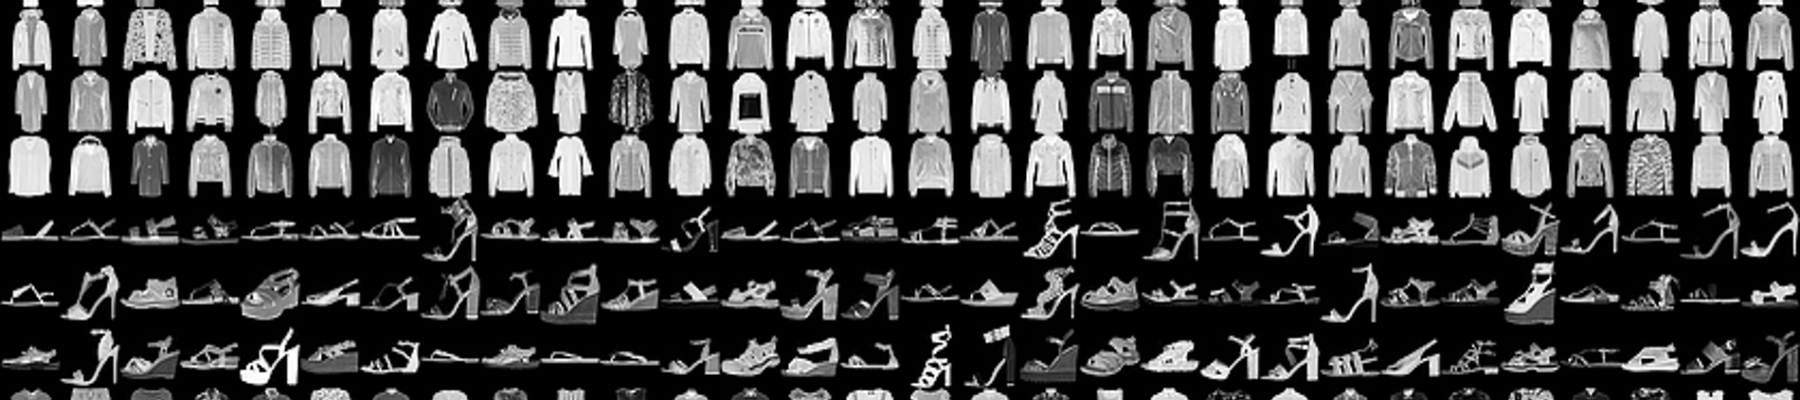

### Xây dựng bộ phân loại

#### Cải thiện cấu trúc mô hình
- BatchNormalization giúp ổn định quá trình huấn luyện và cải thiện hiệu suất.
- Điều chỉnh tỉ lệ Dropout nhằm cân bằng giữa việc giảm overfitting và giữ lại khả năng học của mô hình.

In [37]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),  # Bạn có thể thử điều chỉnh tỉ lệ dropout (ví dụ: 0.4)
    Dense(10, activation='softmax')
])

model.summary()


c:\Users\MK\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 26, 26, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 10, 10, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 523,722 (2.00 MB)

 Trainable params: 523,082 (2.00 MB)

 Non-trainable params: 640 (2.50 KB)

#### Tăng cường dữ liệu
Tạo ra các biến thể của ảnh huấn luyện, giúp mô hình học được các đặc trưng đa dạng hơn và giảm hiện tượng overfitting.

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Tạo đối tượng ImageDataGenerator với các biến đổi
datagen = ImageDataGenerator(
    rotation_range=10,      # Xoay ảnh ngẫu nhiên trong khoảng ±10 độ
    zoom_range=0.1,         # Phóng to/thu nhỏ ảnh
    width_shift_range=0.1,  # Dịch chuyển ảnh theo chiều ngang
    height_shift_range=0.1  # Dịch chuyển ảnh theo chiều dọc
)
# Áp dụng lên tập huấn luyện
datagen.fit(train_images)


####Sử Dụng Callbacks (Early Stopping và Model Checkpoint)

- EarlyStopping giúp tránh overfitting bằng cách dừng huấn luyện khi mô hình không cải thiện.
- ModelCheckpoint lưu lại phiên bản mô hình có hiệu suất tốt nhất dựa trên chỉ số loss trên tập validation.

In [39]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Dừng huấn luyện sớm nếu loss trên validation không cải thiện
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Lưu lại mô hình tốt nhất
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

### Biên dịch mô hình

In [40]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Sử dụng Adam với learning rate nhỏ hơn
optimizer = Adam(learning_rate=0.0005)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Tạo callback để giảm learning rate khi loss không cải thiện
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)


### Huấn luyện và thử nghiệm

- Cung cấp dữ liệu để đào tạo mô hình

In [41]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
batch_size = 128
history = model.fit(
    datagen.flow(train_images, train_labels, batch_size=batch_size),
    validation_data=(test_images, test_labels),
    epochs=15,  # Bạn có thể tăng số epoch nếu cần
    callbacks=[early_stop, lr_scheduler, checkpoint]
)

Epoch 1/15


c:\Users\MK\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.6800 - loss: 0.9310

469/469 ━━━━━━━━━━━━━━━━━━━━ 86s 176ms/step - accuracy: 0.6801 - loss: 0.9305 - val_accuracy: 0.6445 - val_loss: 0.9564 - learning_rate: 5.0000e-04
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.8187 - loss: 0.4944

469/469 ━━━━━━━━━━━━━━━━━━━━ 103s 219ms/step - accuracy: 0.8187 - loss: 0.4943 - val_accuracy: 0.8375 - val_loss: 0.4137 - learning_rate: 5.0000e-04
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.8510 - loss: 0.4139

469/469 ━━━━━━━━━━━━━━━━━━━━ 93s 197ms/step - accuracy: 0.8510 - loss: 0.4139 - val_accuracy: 0.8741 - val_loss: 0.3422 - learning_rate: 5.0000e-04
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.8627 - loss: 0.3768

469/469 ━━━━━━━━━━━━━━━━━━━━ 68s 145ms/step - accuracy: 0.8627 - loss: 0.3768 - val_accuracy: 0.8896 - val_loss: 0.3035 - learning_rate: 5.0000e-04
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 64s 136ms/step - accuracy: 0.8728 - loss: 0.3493 - val_accuracy: 0.8702 - val_loss: 0.3493 - learning_rate: 5.0000e-04
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.8798 - loss: 0.3269

469/469 ━━━━━━━━━━━━━━━━━━━━ 93s 198ms/step - accuracy: 0.8798 - loss: 0.3269 - val_accuracy: 0.9036 - val_loss: 0.2628 - learning_rate: 5.0000e-04
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.8839 - loss: 0.3209

469/469 ━━━━━━━━━━━━━━━━━━━━ 115s 245ms/step - accuracy: 0.8839 - loss: 0.3209 - val_accuracy: 0.9054 - val_loss: 0.2602 - learning_rate: 5.0000e-04
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 0.8865 - loss: 0.3068

469/469 ━━━━━━━━━━━━━━━━━━━━ 114s 242ms/step - accuracy: 0.8865 - loss: 0.3068 - val_accuracy: 0.9084 - val_loss: 0.2545 - learning_rate: 5.0000e-04
Epoch 9/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 113s 241ms/step - accuracy: 0.8903 - loss: 0.3016 - val_accuracy: 0.8867 - val_loss: 0.3046 - learning_rate: 5.0000e-04
Epoch 10/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 114s 243ms/step - accuracy: 0.8912 - loss: 0.2983 - val_accuracy: 0.8742 - val_loss: 0.3651 - learning_rate: 5.0000e-04
Epoch 11/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 120s 256ms/step - accuracy: 0.8966 - loss: 0.2818 - val_accuracy: 0.8998 - val_loss: 0.2722 - learning_rate: 5.0000e-04
Epoch 12/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - accuracy: 0.9036 - loss: 0.2689

469/469 ━━━━━━━━━━━━━━━━━━━━ 111s 238ms/step - accuracy: 0.9036 - loss: 0.2689 - val_accuracy: 0.9101 - val_loss: 0.2441 - learning_rate: 2.5000e-04
Epoch 13/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 115s 245ms/step - accuracy: 0.9069 - loss: 0.2566 - val_accuracy: 0.9034 - val_loss: 0.2587 - learning_rate: 2.5000e-04
Epoch 14/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - accuracy: 0.9081 - loss: 0.2531

469/469 ━━━━━━━━━━━━━━━━━━━━ 114s 242ms/step - accuracy: 0.9081 - loss: 0.2531 - val_accuracy: 0.9109 - val_loss: 0.2401 - learning_rate: 2.5000e-04
Epoch 15/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 109s 233ms/step - accuracy: 0.9137 - loss: 0.2453 - val_accuracy: 0.9073 - val_loss: 0.2524 - learning_rate: 2.5000e-04


### Đánh giá mô hình

In [43]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9120 - loss: 0.2417


In [44]:
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_acc)

Test Loss:  0.24010056257247925
Test Accuracy:  0.9108999967575073


- Truy cập tổn thất và chi tiết độ chính xác từ lịch sử huấn luyện

In [45]:
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']

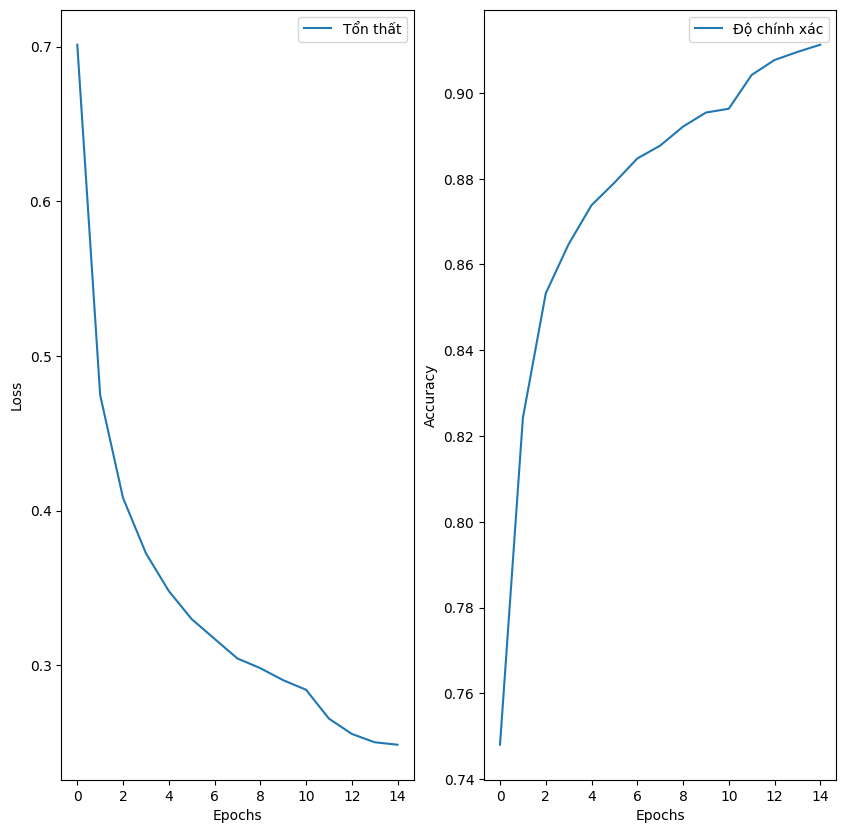

In [46]:
# Create subplots for loss and accuracy
plt.figure(figsize=(10, 10))
# Loss subplot
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Tổn thất')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy subplot
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Độ chính xác')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

- Theo biểu đồ, sự mất mát đã giảm và độ chính xác đã được tăng lên với mỗi lần thử nghiệm

### Dự đoán mẫu thử nghiệm

In [47]:
model.predict(test_images)[10].argmax()

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step


np.int64(4)

In [48]:
test_labels[10]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [49]:
test_labels[10].argmax()

np.int64(4)

- Yêu cầu mô hình đưa ra dự đoán về một mẫu kiểm tra

In [59]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


- Xác minh rằng các dự đoán phù hợp với các nhãn từ các nhãn kiểm tra

### **Thực nghiệm**

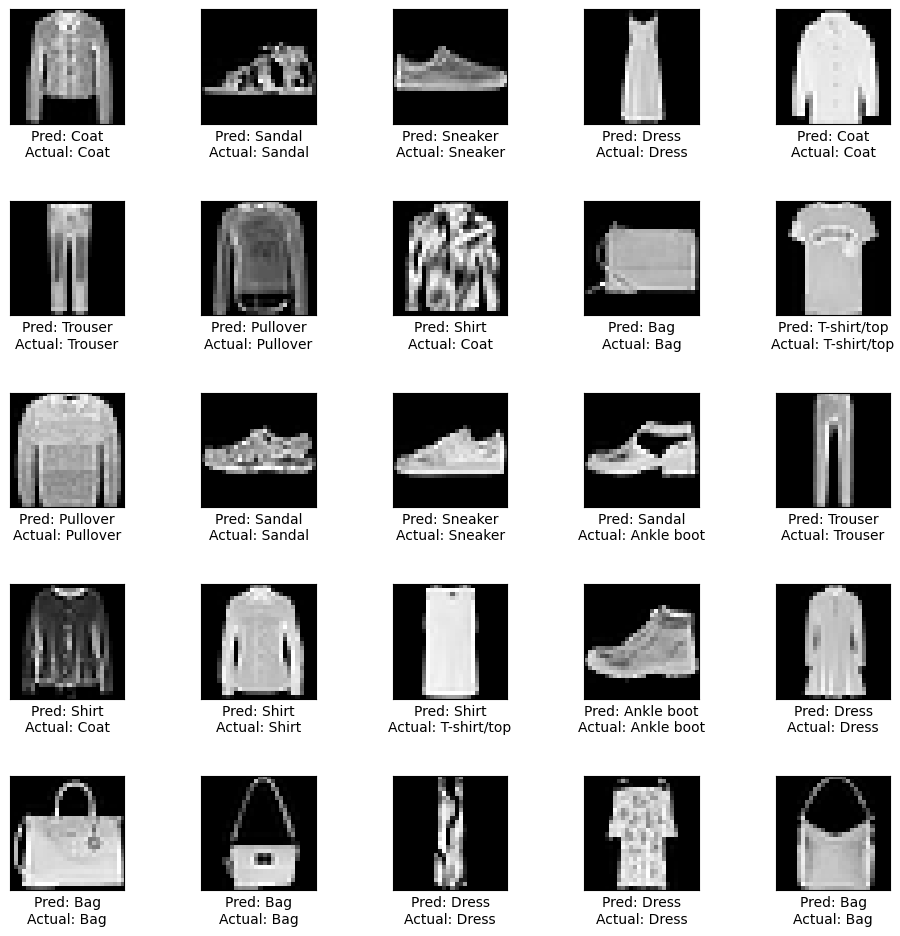

In [60]:

# Create a axb grid of subplots
fig, axes = plt.subplots(5, 5, figsize=(10, 10))

# Assuming you have defined labels_dict, predictions, and test_labels earlier
c = 10
for i in range(5):
    for j in range(5):
        # Dự đoán của mô hình cho ảnh thứ c
        prediction = predictions[c].argmax()
        # Kết quả thực tế (lấy chỉ số nhãn từ one-hot encoding)
        actual = test_labels[c].argmax()

        # Hiển thị ảnh (ảnh xám)
        axes[i, j].imshow(test_images[c], cmap='gray')
        # Hiển thị dự đoán và kết quả thực tế
        axes[i, j].set_xlabel(f"Pred: {labels_dict[prediction]}\nActual: {labels_dict[actual]}")
        axes[i, j].set_xticks([])  # Ẩn trục x
        axes[i, j].set_yticks([])  # Ẩn trục y
        c += 1

plt.tight_layout(pad=3.0)  # Điều chỉnh khoảng cách giữa các subplot
plt.show()


In [61]:
# Chuyển đổi one-hot encoding của test_labels về dạng số nguyên
actual_labels = test_labels.argmax(axis=1)

# Lấy nhãn dự đoán của mô hình
predicted_labels = predictions.argmax(axis=1)

# Tính số lần dự đoán đúng và sai
correct_predictions = (predicted_labels == actual_labels).sum()
wrong_predictions = len(actual_labels) - correct_predictions

# Tính tỷ lệ phần trăm chính xác
accuracy = (correct_predictions / len(actual_labels)) * 100

# In kết quả
print(f"Số lần dự đoán đúng: {correct_predictions}")
print(f"Số lần dự đoán sai: {wrong_predictions}")
print(f"Độ chính xác của mô hình trên tập kiểm tra: {accuracy:.2f}%")


Số lần dự đoán đúng: 9109
Số lần dự đoán sai: 891
Độ chính xác của mô hình trên tập kiểm tra: 91.09%
